In [1]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
from textblob import TextBlob

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/posi2/Text-Sentiment-Analysis/master/final_review.csv",header=None,names=('text','sentiment'))

In [3]:
data.head()

,text,sentiment
0,Value for money M happy Delivered in right time,1
1,Excellent,1
2,Awesome,1
3,The packing is very good and phone is much bet...,1
4,Nice n so hot look,1


In [4]:
data.shape

(2487, 2)

In [5]:
df_positive=data.loc[data['sentiment']==1]
df_positive.reset_index(inplace=True)
df_neutral=data.loc[data['sentiment']==0]
df_neutral.reset_index(inplace=True)
df_negative=data.loc[data['sentiment']==-1]
df_negative.reset_index(inplace=True)

In [6]:
positive_values=df_positive.shape[0]
negative_values=df_negative.shape[0]
neutral_values=df_neutral.shape[0]

In [7]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # needed for waffle Charts

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.0.3


In [17]:
def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):

    # compute the proportion of each category with respect to the total
    total_values = data.shape[0]
    category_proportions = [(float(value) / total_values) for value in values]

    # compute the total number of tiles
    total_num_tiles = width * height # total number of tiles
    print ('Total number of tiles is', total_num_tiles)
        
    # compute the number of tiles for each catagory
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

   
    # initialize the waffle chart as an empty matrix
    waffle_chart = np.zeros((height, width))

    # define indices to loop through waffle chart
    category_index = 0
    tile_index = 0

    # populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1

            # if the number of tiles populated for the current category 
            # is equal to its corresponding allocated tiles...
            if tile_index > sum(tiles_per_category[0:category_index]):
                # ...proceed to the next category
                category_index += 1       
            
            # set the class value to an integer, which increases with class
            waffle_chart[row, col] = category_index
    
    # instantiate a new figure object
    fig = plt.figure()

    # use matshow to display the waffle chart
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    # get the axis
    ax = plt.gca()

    # set minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
    # add dridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    # compute cumulative sum of individual categories to match color schemes between chart and legend
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]
    
    
    # create legend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'
            
        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    # add legend to chart
    plt.legend(
        handles=legend_handles,
        loc='lower center', 
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )

In [15]:
width = 60 # width of chart
height = 10 # height of chart

categories = ('positive','neutral','negative') # categories
values=(positive_values,neutral_values,negative_values)
colormap = plt.cm.coolwarm # color map class

Total number of tiles is 600


<Figure size 14400x1440 with 0 Axes>

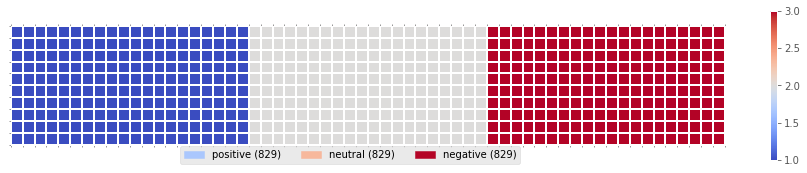

In [16]:
create_waffle_chart(categories, values, height, width, colormap, value_sign='')